In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 



In [3]:
df=pd.read_csv("./amplificador.dat",delimiter="\t") #lectura del archivo    


voltaje=np.array(df.mV) #crear un arreglo con los datos del archivo


#Calculamos el valor medio y la desviación estándar
mu=np.mean(voltaje)
sigma=np.std(voltaje)

In [4]:
print(f"Valor medio = {mu}")
print(f"Desviación estándar = {sigma:.4f}")

Valor medio = 7501.8
Desviación estándar = 26.7433


## Histogramas

In [5]:
def nbins(canal,data):
    # Función para calcular el tamaño de bins dependiendo de el voltaje en cada canal
    bins=int((np.max(data)-np.min(data))/canal)
    return bins

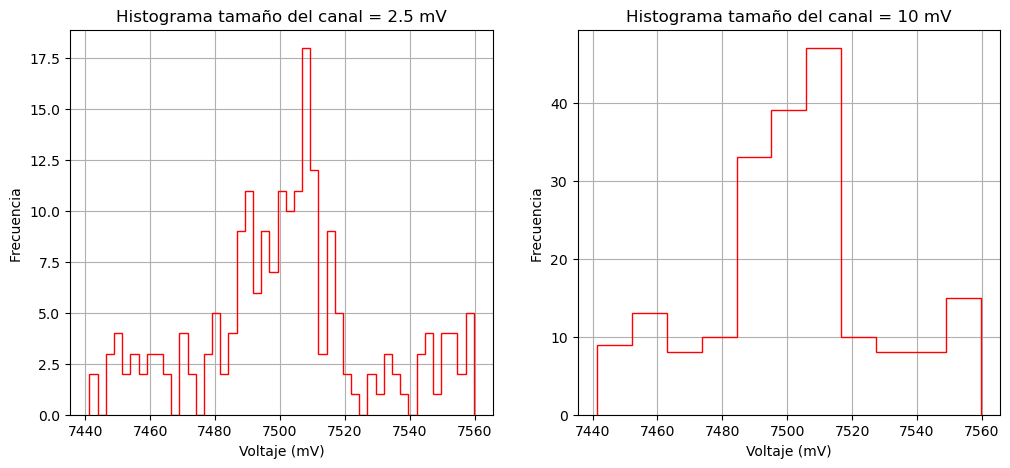

In [6]:
fig,ax = plt.subplots(1,2, figsize=(12,5))

ax[0].hist(voltaje, bins=nbins(2.5,voltaje),color="r",histtype='step')
ax[0].set_xlabel("Voltaje (mV)")
ax[0].set_ylabel("Frecuencia ")
ax[0].set_title("Histograma tamaño del canal = 2.5 mV")
ax[0].grid()


ax[1].hist(voltaje, bins=nbins(10,voltaje),color="r",histtype='step')
ax[1].set_xlabel("Voltaje (mV)")
ax[1].set_ylabel("Frecuencia ")
ax[1].set_title("Histograma tamaño del canal = 10 mV")
ax[1].grid()

plt.show()

## Calculo de momentos con histogramas

In [57]:
freq25, limcanales25= np.histogram(voltaje,bins=nbins(2.5,voltaje)) #calculamos el histograma para canales de 2.5
freq10, limcanales10= np.histogram(voltaje,bins=nbins(10,voltaje)) #calculamos el histograma para canales de 10


valor_medio_canal25=np.zeros(len(freq25))
valor_medio_canal10=np.zeros(len(freq10))

#calculamos los valores medios de cada canal para ambos histogramas
for i in range (0,len(limcanales25)-1):
    valor_medio_canal25[i]=(limcanales25[i]+limcanales25[i+1])/2 
    
for i in range (0,len(limcanales10)-1):
    valor_medio_canal10[i]=(limcanales10[i]+limcanales10[i+1])/2 


#calculamos valor medio y desviación

mu25=1/np.sum(freq25) * (np.dot(freq25,valor_medio_canal25))
sigma25=np.sqrt( 1/np.sum(freq25) * np.dot((valor_medio_canal25-mu25)**2,freq25))



mu10=1/np.sum(freq10) * (np.dot(freq10,valor_medio_canal10))
sigma10=np.sqrt( 1/np.sum(freq10) * np.dot((valor_medio_canal10-mu10)**2,freq10))

#imprimimos los valores obtenidos
print(f"Valor medio canal 2.5 mV = {mu25}")
print(f"Desviación estándar canal 2.5 mV = {sigma25:.4f}")
print("\n")
print(f"Valor medio canal 10 mV = {mu10}")
print(f"Desviación estándar canal 10 mV = {sigma10:.4f}")



Valor medio canal 2.5 mV = 7501.772170212765
Desviación estándar canal 2.5 mV = 26.6780


Valor medio canal 10 mV = 7501.791636363636
Desviación estándar canal 10 mV = 26.7701
